### Getting Started with Images
Goals<br>

• Here, you will learn how to read an image, how to display it and how to save it back<br>

• You will learn these functions : cv2.imread(), cv2.imshow() , cv2.imwrite()<br>

• Optionally, you will learn how to display images with Matplotlib
Using OpenCV<br>

### Read an image


Use the function cv2.imread() to read an image. The image should be in the working directory or a full path of image
should be given.<br>

Second argument is a flag which specifies the way image should be read.<br>

• cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default
flag.<br>

• cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode<br>

• cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel<br>


In [1]:
import numpy as np
import cv2

img = cv2.imread('First.jpeg',0)

### Display an image
Use the function cv2.imshow() to display an image in a window. The window automatically fits to the image size.<br>

First argument is a window name which is a string. second argument is our image. You can create as many windows<br>
as you wish, but with different window names.<br>

In [2]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### cv2.waitKey() 
is a keyboard binding function. Its argument is the time in milliseconds. The function waits for<br>
specified milliseconds for any keyboard event. If you press any key in that time, the program continues. If 0 is passed,<br>
it waits indefinitely for a key stroke. It can also be set to detect specific key strokes like, if key a is pressed etc which
we will discuss below.<br>
### cv2.destroyAllWindows()
simply destroys all the windows we created. If you want to destroy any specific window,<br>
use the function cv2.destroyWindow() where you pass the exact window name as the argument.<br>

### Note:
There is a special case where you can already create a window and load image to it later. In that case, you can<br>
specify whether window is resizable or not. It is done with the function cv2.namedWindow(). By default, the flag is<br>
cv2.WINDOW_AUTOSIZE. But if you specify flag to be cv2.WINDOW_NORMAL, you can resize window. It will be<br>
helpful when image is too large in dimension and adding track bar to windows.<br>

See the code below:
    



In [3]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Write an image
Use the function cv2.imwrite() to save an image.<br>
First argument is the file name, second argument is the image you want to save.<br>

In [4]:
cv2.imwrite('avengers.png',img)
#This will save the image in PNG format in the working directory.

True

### To Sum it up
Below program loads an image in grayscale, displays it, save the image if you press ‘s’ and exit, or simply exit without<br>
saving if you press ESC key.<br>

In [5]:
import numpy as np
import cv2
img = cv2.imread('lena.jpg',0)
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27: # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('messigray.png',img)
cv2.destroyAllWindows()

### Using Matplotlib
Matplotlib is a plotting library for Python which gives you wide variety of plotting methods. You will see them in<br>
coming articles. Here, you will learn how to display image with Matplotlib. You can zoom images, save it etc using<br>
Matplotlib.<br>


TypeError: Image data cannot be converted to float

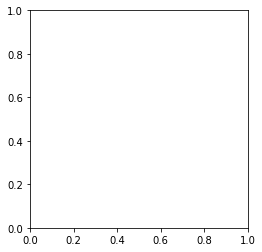

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('first.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

### Drawing Functions in OpenCV
Goal<br>
• Learn to draw different geometric shapes with OpenCV<br>

• You will learn these functions : cv2.line(), cv2.circle() , cv2.rectangle(), cv2.ellipse(), cv2.putText() etc.<br>
Code<br>
In all the above functions, you will see some common arguments as given below:<br>
• img : The image where you want to draw the shapes<br>

• color : Color of the shape. for BGR, pass it as a tuple, eg: (255,0,0) for blue. For grayscale, just pass the<br>
scalar value.<br>

• thickness : Thickness of the line or circle etc. If -1 is passed for closed figures like circles, it will fill the shape.<br>
default thickness = 1<br>

• lineType : Type of line, whether 8-connected, anti-aliased line etc. By default, it is 8-connected. cv2.LINE_AA<br>
gives anti-aliased line which looks great for curves.<br>


### Drawing Line
To draw a line, you need to pass starting and ending coordinates of line. We will create a black image and draw a blue<br>
line on it from top-left to bottom-right corners.<br>




In [17]:
import numpy as np
import cv2
# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Drawing Rectangle
To draw a rectangle, you need top-left corner and bottom-right corner of rectangle. This time we will draw a green<br>
rectangle at the top-right corner of image.<br>


In [18]:
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Drawing Circle
To draw a circle, you need its center coordinates and radius. We will draw a circle inside the rectangle drawn above.


In [21]:
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Drawing Ellipse
To draw the ellipse, we need to pass several arguments. One argument is the center location (x,y). Next argument is<br>
axes lengths (major axis length, minor axis length). angle is the angle of rotation of ellipse in anti-clockwise direction.<br> 
startAngle and endAngle denotes the starting and ending of ellipse arc measured in clockwise direction<br>
from major axis. i.e. giving values 0 and 360 gives the full ellipse. For more details, check the documentation of<br>
cv2.ellipse(). Below example draws a half ellipse at the center of the image.<br>

In [23]:
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Drawing Polygon
To draw a polygon, first you need coordinates of vertices. Make those points into an array of shape ROWSx1x2 where<br>
ROWS are number of vertices and it should be of type int32. Here we draw a small polygon of with four vertices in<br>
yellow color.<br>

In [27]:
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
### Adding Text to Images:
To put texts in images, you need specify following things.<br>
• Text data that you want to write<br>
• Position coordinates of where you want put it (i.e. bottom-left corner where data starts).
• Font type (Check cv2.putText() docs for supported fonts)
• Font Scale (specifies the size of font)
• regular things like color, thickness, lineType etc. For better look, lineType = cv2.LINE_AA is
recommended.
We will write OpenCV on our image in white color.

In [26]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()